# Model Appropriateness

One of the key themes we want to encourage you to think about is **model appropriateness**. In this example, we will take a look at sine waves. Sine waves are very relevant to much of Psychology and Neuroscience - for example in describing [neural oscillations](https://en.wikipedia.org/wiki/Neural_oscillation).

## What the heck is a sine wave?

Sine waves are described by three main parameters:
* *Amplitude (or "Power")* - you could think of this as "loudness"
* *Frequency* - you could think of this as "pitch", or the tempo of a repetitive beat
* *Phase* - you could think of this as shift in the timing of beats (how soon after 0 is the first beat?)

<img src="power.gif" onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/JackEdTaylor/expra-wise24/master/lecture/introduction/power.gif';" class=".float-right" width="250px">

<img src="frequency.gif" onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/JackEdTaylor/expra-wise24/master/lecture/introduction/frequency.gif';" class=".float-right" width="250px">

<img src="phase.gif" onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/JackEdTaylor/expra-wise24/master/lecture/introduction/phase.gif';" class=".float-right" width="250px">

Don't worry if this is all new! In fact, in this example, we're going to simplify things a bit and **focus on amplitude (power)**...

## Our example analysis

Let's use an example where we pretend we know the phase and frequency. Instead we'll focus on **amplitude (power)** and **offset from zero (an intercept)**. To make things tricky, let's pretend that our device is very noisy - every time we take a measurement, there will be some unknown **noise** that we want to try to account for.

<img src="model_appropriateness_amplitude.gif" onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/JackEdTaylor/expra-wise24/master/lecture/introduction/model_appropriateness_amplitude.gif';" class=".float-right" width="250px">

<img src="model_appropriateness_offset.gif" onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/JackEdTaylor/expra-wise24/master/lecture/introduction/model_appropriateness_offset.gif';" class=".float-right" width="250px">

<img src="model_appropriateness_noise.gif" onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/JackEdTaylor/expra-wise24/master/lecture/introduction/model_appropriateness_noise.gif';" class=".float-right" width="250px">

We'll show that a simple linear model is inappropriate for describing data that records an oscillation, but that a more appropriate model can describe these data much better.

### 1: Generate the Data

First of all, we need to generate the data we will use. We will also be using the packages `tibble` and `ggplot2`, so make sure these are loaded!

In [1]:
options(repr.plot.width=3.5, repr.plot.height=3)

In [2]:
# import libraries
library(tibble)
library(ggplot2)

# set ggplot2 theme
theme_set(theme_classic())

# set a seed for reproducibility
set.seed(999)

Here we generate 250 observations from a Sine wave, with amplitude of 3.7 and with normally distributed noise of SD=0.8. We'll also offset the sine wave from 0, by 2.3.

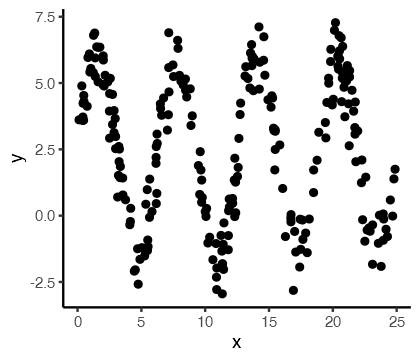

In [3]:
n <- 250  # number of observations
amplitude <- 3.7  # amplitude of the sine wave
offset <- 2.3  # offset from 0
noise_sd <- 0.8  # SD of noise

data <- tibble(
  # randomly sample x values from 0 to 25
  x = runif(n=n, min=0, max=25),
  # generate the perfect sine wave
  s = offset + amplitude * sin(x),
  # generate random noise of desired sd
  e = rnorm(n=n, mean=0, sd=noise_sd),
  # add the sine wave to the noise to simulate observations
  y = s + e
)

# plot the observations
ggplot(data, aes(x, y)) +
  geom_point()

This shows that the pattern is clearly non-random - there is an obvious relationship between x and y.

### 2: Try a Simple Linear Model / Pearson Correlation

Let's get the Pearson correlation coefficient for our data.

In [4]:
# get the Pearson's correlation
cor(data$x, data$y)

[1] -0.09306383

The Pearson's correlation is very close to zero - why do you think that is?

The Pearson's correlation is based on a linear model. Here is what that looks like using the `lm()` function:

In [5]:
summary( lm(y ~ x, data=data) )


Call:
lm(formula = y ~ x, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5523 -2.3956  0.3638  2.3431  4.9769 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.99708    0.32973   9.090   <2e-16 ***
x           -0.03453    0.02346  -1.472    0.142    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.722 on 248 degrees of freedom
Multiple R-squared:  0.008661,	Adjusted R-squared:  0.004664 
F-statistic: 2.167 on 1 and 248 DF,  p-value: 0.1423


The estimate for the `Intercept`, of about 3, is very roughly approximating our `offset` of 2.3. `x` is an estimate for a linear slope.

To better understand this, we can also visualise the linear relationship that the Pearson's correlation is based on...

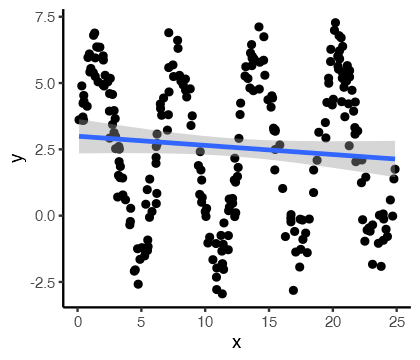

In [6]:
# superimpose the simple linear model
ggplot(data, aes(x, y)) +
  geom_point() +
  geom_smooth(method="lm", formula=y~x)

Clearly, a simple Pearson's correlation, and the associated simple linear model, are completely inappropriate in this case! It's missing important information that we know about the data.

One solution could be to use a measure of association that makes minimal assumptions about the nature of the relationship. For example, we could use [mutual information](https://en.wikipedia.org/wiki/Mutual_information) to quantify the degree to which we learn information about one variable by observing the other. If you're interested in trying out mutual information, you might want to try the R package [`infotheo`](https://cran.r-project.org/web/packages/infotheo/index.html).

**However, a better approach may be to fit a more specific model**, which allows us to incorporate our knowledge about how the data were generated - via a sine function.

### 3: Fit a more Appropriate Model

If we happen know that a the data is generated from a sine function with a certain amplitude, we could fit a model that accounts for this. Here, instead of `y ~ x`, our formula would be `y ~ sin(x)`

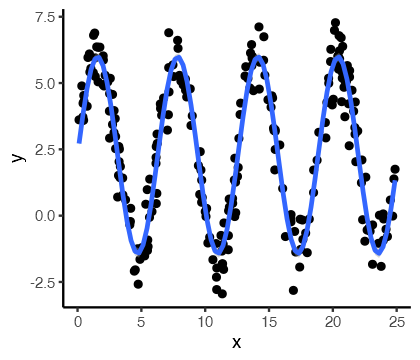

In [7]:
ggplot(data, aes(x, y)) +
  geom_point() +
  geom_smooth(method="lm", formula = y ~ sin(x))

This is looking like a much better description of the data!

Here is what the `lm()` output looks like.

In [8]:
lm(y ~ sin(x), data=data)


Call:
lm(formula = y ~ sin(x), data = data)

Coefficients:
(Intercept)       sin(x)  
      2.282        3.709  


How cool! Notice that this model is now able to estimate our parameters from before!

* The `Intercept` estimates our offset parameter of 2.3
* The `sin(x)` part estimates our amplitude of 3.7

But what about the noise? The `noise_sd` parameter represents the standard deviation of noise (*residuals*) in the data. The `resid()` function lets us calculate our residuals. For each observation in the data this gives us a value for the difference between our model predictions and original observations. If we use `sd()` to calculate the standard deviation of these, we can even approximate our `noise_sd` parameter of 0.8.

In [9]:
mod <- lm(y ~ sin(x), data=data)  # store model in an object
residuals <- resid(mod)  # calculate residuals
sd(residuals)  # get the SD of residuals

[1] 0.7569488

Finally, if we wanted to, we could calculate an equivalent of the Pearson's correlation for this more appropriate model, which is much better at capturing the strength of the clear relationship that we can see in the data.

In [10]:
cor(sin(data$x), data$y)

[1] 0.9607514

### 4: Test your Understanding!

**a**) Try changing the `noise_sd` parameter - what happens to your estimates in the last section as you increase and decrease this parameter? What happens when you change the `amplitude` parameter?

**b**) Calculate the Akaike Information Criteria (AICs) for the two models using the `AIC()` or the `summary()` function. How do the AICs compare? How can you interpret this?

**c**) Would this work for a cosine too? Try to change the code above to simulate and estimate data from a cosine function.

**d**) Can you rewrite the code to use the following transformations? `log()`, `exp()`, exponentiation using `^`. Any more transformations can think of?

**e**) **Tricky**: Create a new variable in *Step 1.*, called `ls` (standing for linear slope), and set it to a value of your choice (I recommend picking a number between -2 and 2). Now, change the formula in the simulation in *Step 1.* from `y = s + e` to `y = s + ls * x + e`. Try running the code in the later sections. Can you figure out a way to alter the code in *Step 3.* to estimate all the values for `offset`, `amplitude`, and `ls`?

<br>

<img src="linearmodel.jpg" onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/JackEdTaylor/expra-wise24/master/lecture/introduction/linearmodel.jpg';" width="350px">